In [ ]:
!pip install soundfile

In [ ]:
!pip list | grep librosa

librosa                          0.10.1


In [ ]:
Root = "/content/drive/MyDrive/Colab Notebooks/speech-emotion-recognition-ravdess-data"
os.chdir(Root)

NameError: name 'os' is not defined

In [ ]:
ls

sample_data/


In [ ]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
import matplotlib.pyplot as plt
import joblib
import scipy
from librosa.feature import chroma_stft
from librosa import display
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data, sampling_rate = librosa.load('/content/drive/MyDrive/Colab Notebooks/speech-emotion-recognition-ravdess-data/Actor_01/03-01-01-01-01-01-01.wav')

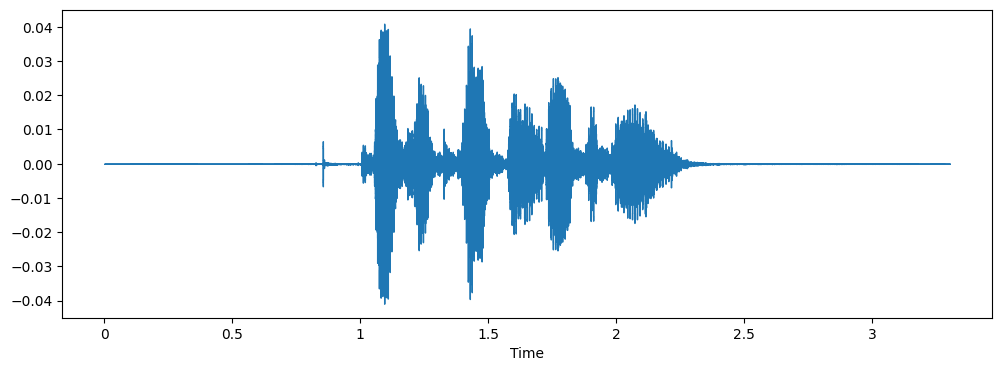

In [ ]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sampling_rate)

# Let's check which classifier is the best:

### MLP Classifier:

In [ ]:
#Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [ ]:
# Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#Emotions to observe
observed_emotions=  ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']


In [ ]:
'''
from google.colab import drive
drive.mount('/content')
'''

"\nfrom google.colab import drive\ndrive.mount('/content')\n"

In [ ]:
#Load the data and extract features for each sound file
def load_data(test_size=0.2):
  x,y=[],[]
  for file in glob.glob("/content/drive/MyDrive/Colab Notebooks/speech-emotion-recognition-ravdess-data/Actor_*/*.wav"):
      file_name=os.path.basename(file)
      emotion=emotions[file_name.split("-")[2]]
      print(emotion)
      if emotion not in observed_emotions:
          continue
      feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
      x.append(feature)
      y.append(emotion)
  return train_test_split(np.array(x), y, test_size=test_size, train_size= 0.75, random_state=9)

In [ ]:
#Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

calm
calm
calm
calm
neutral
calm
calm
neutral
calm
neutral
neutral
happy
happy
happy
happy
sad
sad
sad
sad
sad
sad
happy
angry
sad
calm
happy
sad
happy
happy
angry
fearful
fearful
angry
angry
fearful
angry
angry
angry
fearful
fearful
fearful
angry
disgust
surprised
disgust
disgust
surprised
surprised
disgust
disgust
fearful
fearful
surprised
disgust
surprised
disgust
surprised
disgust
surprised
surprised
calm
calm
neutral
calm
neutral
happy
neutral
calm
neutral
calm
calm
calm
calm
happy
happy
sad
sad
sad
happy
sad
angry
happy
angry
happy
angry
sad
happy
sad
happy
sad
sad
disgust
disgust
fearful
angry
angry
fearful
fearful
angry
fearful
angry
fearful
fearful
disgust
disgust
fearful
angry
fearful
surprised
surprised
surprised
surprised
disgust
surprised
surprised
surprised
disgust
surprised
disgust
disgust
happy
calm
neutral
happy
calm
calm
calm
neutral
calm
calm
happy
calm
neutral
calm
neutral
happy
sad
sad
sad
happy
angry
sad
happy
happy
sad
sad
sad
angry
angry
angry
sad
happy
angry
an

In [ ]:
x_train

array([[-4.70447571e+02,  1.76569118e+01, -2.86761608e+01, ...,
         5.40096022e-04,  4.01184749e-04,  4.11149580e-04],
       [-5.51792542e+02,  4.87300224e+01, -1.33356428e+01, ...,
         8.63384106e-04,  7.99472618e-04,  4.26924060e-04],
       [-6.74201782e+02,  2.74565735e+01, -3.39273810e+00, ...,
         7.55977671e-05,  4.15748073e-05,  3.61571547e-05],
       ...,
       [-6.37023438e+02,  4.30761299e+01, -2.21838379e+01, ...,
         2.04669614e-05,  1.10985393e-05,  8.32544811e-06],
       [-5.96424561e+02,  3.44033241e+01, -6.03021562e-01, ...,
         2.49632809e-04,  1.25749284e-04,  5.75295890e-05],
       [-6.18082214e+02,  4.20273018e+01, -1.29998455e+01, ...,
         1.62260603e-05,  8.61857097e-06,  5.72339059e-06]])

In [ ]:
#Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(1080, 360)


In [ ]:
#Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [ ]:
#Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [ ]:
#Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [ ]:
#Predict for the test set
y_pred=model.predict(x_test)

In [ ]:
y_pred

array(['disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'happy',
       'neutral', 'sad', 'calm', 'angry', 'disgust', 'disgust', 'disgust',
       'happy', 'disgust', 'surprised', 'neutral', 'disgust', 'angry',
       'surprised', 'sad', 'happy', 'angry', 'sad', 'neutral', 'angry',
       'sad', 'angry', 'neutral', 'disgust', 'disgust', 'neutral', 'sad',
       'happy', 'disgust', 'disgust', 'disgust', 'happy', 'sad', 'angry',
       'disgust', 'disgust', 'disgust', 'happy', 'surprised', 'sad',
       'disgust', 'sad', 'disgust', 'disgust', 'fearful', 'surprised',
       'disgust', 'neutral', 'sad', 'calm', 'disgust', 'disgust',
       'surprised', 'disgust', 'angry', 'angry', 'disgust', 'angry',
       'fearful', 'angry', 'disgust', 'surprised', 'sad', 'neutral',
       'happy', 'neutral', 'fearful', 'neutral', 'happy', 'sad',
       'disgust', 'disgust', 'disgust', 'sad', 'neutral', 'disgust',
       'sad', 'angry', 'calm', 'disgust', 'calm', 'neutral', 'calm',
       'neutral'

In [ ]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 46.67%


In [ ]:
### classification report:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       angry       0.86      0.63      0.73        49
        calm       0.88      0.25      0.39        56
     disgust       0.31      0.76      0.44        49
     fearful       0.64      0.30      0.41        47
       happy       0.50      0.40      0.44        45
     neutral       0.27      0.48      0.35        29
         sad       0.46      0.54      0.50        48
   surprised       0.70      0.38      0.49        37

    accuracy                           0.47       360
   macro avg       0.58      0.47      0.47       360
weighted avg       0.59      0.47      0.47       360



In [ ]:
### confiusion matrix:
matrix = confusion_matrix(y_test,y_pred)
print (matrix)

[[31  0 11  2  2  0  1  2]
 [ 0 14 18  0  1 12 11  0]
 [ 0  0 37  2  3  4  2  1]
 [ 1  0 11 14  8  3 10  0]
 [ 4  1  7  2 18  5  5  3]
 [ 0  0 14  0  0 14  1  0]
 [ 0  1  9  2  0 10 26  0]
 [ 0  0 14  0  4  4  1 14]]


In [ ]:
f1_score(y_test, y_pred,average=None)

array([0.72941176, 0.38888889, 0.43529412, 0.4057971 , 0.44444444,
       0.34567901, 0.4952381 , 0.49122807])

In [ ]:
import pandas as pd
df=pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df.head(20)

,Actual,Predicted
0,disgust,disgust
1,sad,disgust
2,calm,disgust
3,neutral,disgust
4,calm,disgust
5,happy,happy
6,disgust,neutral
7,sad,sad
8,calm,calm
9,angry,angry


In [ ]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction1.sav', 'wb') as f:
    pickle.dump(model,f)

In [ ]:
filename = 'modelForPrediction1.sav'
loaded_model = pickle.load(open(filename, 'rb')) # loading the model file from the storage

feature=extract_feature("/content/drive/MyDrive/Colab Notebooks/speech-emotion-recognition-ravdess-data/Actor_01/03-01-01-01-01-01-01.wav", mfcc=True, chroma=True, mel=True)

feature=feature.reshape(1,-1)

prediction=loaded_model.predict(feature)
prediction

array(['neutral'], dtype='<U9')

In [ ]:
feature

array([[-6.93497009e+02,  5.00643883e+01,  5.71448743e-01,
         1.43299656e+01,  3.33636951e+00, -2.54072022e+00,
        -4.05790997e+00, -1.07120008e+01, -7.29414034e+00,
         1.74018884e+00, -4.19064379e+00,  1.95466149e+00,
        -5.24789381e+00,  2.78142977e+00, -3.16756725e+00,
        -3.40008307e+00, -2.37803268e+00, -5.68717360e-01,
        -6.47753239e+00, -1.24320555e+00, -2.80542541e+00,
        -5.43635845e+00, -4.46875215e-01, -3.63516641e+00,
        -2.98372531e+00, -5.63902140e-01, -1.65102005e+00,
        -5.55944622e-01, -3.41018462e+00, -2.24465513e+00,
        -3.13058853e+00, -2.70090008e+00, -1.88821292e+00,
        -5.54154515e-01, -3.96459818e+00, -2.13485217e+00,
        -3.94577146e+00, -1.62457824e+00, -2.03990746e+00,
        -3.62910891e+00,  6.33734763e-01,  6.48760557e-01,
         6.21744215e-01,  6.34553194e-01,  6.60345614e-01,
         6.60463989e-01,  7.00949013e-01,  7.31556296e-01,
         7.46921480e-01,  7.23420501e-01,  7.16119647e-0